In [55]:
import numpy as np
import pandas as pd

In [56]:
def compute_precision_at_k(relevances, k):
    trimmed_rel = relevances[:k]

    tp = sum(trimmed_rel == 1)
    return tp / float(k)

def compute_dcg(relevance, ranks,k):
#     assert(len(relevances) == len(ranks))
    trimmed_rel = relevance[:k]
    trimmed_ranks = ranks[:k]
    return np.sum(np.divide(
        trimmed_rel,
        np.log2(trimmed_ranks + 1),
         ))

In [57]:
df_exp = pd.read_csv('data/full_results-with-subject.csv')
df_truth = pd.read_csv('data/LA-only.trec8-401.450.minus416-423-437-444-447.txt', header=None, sep=' ')
df_truth.columns = ['topicID', 'q', 'docno', 'relevance']
df_truth.drop(['q'], axis=1,inplace=True)

In [58]:
df_j =pd.merge(df_exp, df_truth, on=['topicID', 'docno'], how='left').fillna(0)

In [67]:
df_j[df_j['topicID'] == 404].head(10)

,docno,q0,query,rank,runTag,run_time,score,topicID,relevance
1368,LA070390-0077,0,"Ireland, peace talks",1,cjngan_run0,0.168155,19.736302,404,0
1369,LA070289-0091,0,"Ireland, peace talks",2,cjngan_run0,0.168155,15.965651,404,0
1370,LA070490-0024,0,"Ireland, peace talks",3,cjngan_run0,0.168155,14.574969,404,0
1371,LA070789-0010,0,"Ireland, peace talks",4,cjngan_run0,0.168155,14.392684,404,0
1372,LA121090-0081,0,"Ireland, peace talks",5,cjngan_run0,0.168155,14.315660,404,0
1373,LA060290-0120,0,"Ireland, peace talks",6,cjngan_run0,0.168155,13.793831,404,0
1374,LA111290-0101,0,"Ireland, peace talks",7,cjngan_run0,0.168155,13.619613,404,0
1375,LA111389-0059,0,"Ireland, peace talks",8,cjngan_run0,0.168155,13.593535,404,0
1376,LA022490-0037,0,"Ireland, peace talks",9,cjngan_run0,0.168155,13.448977,404,0
1377,LA090689-0068,0,"Ireland, peace talks",10,cjngan_run0,0.168155,13.373159,404,0


In [60]:
df_j.head(10)

,docno,q0,query,rank,runTag,run_time,score,topicID,relevance
0,LA101790-0075,0,"foreign minorities, Germany",1,cjngan_run0,0.375591,13.119502,401,0
1,LA021890-0100,0,"foreign minorities, Germany",2,cjngan_run0,0.375591,12.766692,401,0
2,LA121289-0099,0,"foreign minorities, Germany",3,cjngan_run0,0.375591,12.572463,401,0
3,LA050690-0109,0,"foreign minorities, Germany",4,cjngan_run0,0.375591,12.472119,401,0
4,LA031590-0102,0,"foreign minorities, Germany",5,cjngan_run0,0.375591,12.459015,401,0
5,LA050990-0043,0,"foreign minorities, Germany",6,cjngan_run0,0.375591,12.383075,401,0
6,LA040590-0157,0,"foreign minorities, Germany",7,cjngan_run0,0.375591,12.277891,401,0
7,LA021590-0209,0,"foreign minorities, Germany",8,cjngan_run0,0.375591,12.200374,401,0
8,LA050789-0068,0,"foreign minorities, Germany",9,cjngan_run0,0.375591,12.098091,401,1
9,LA021490-0049,0,"foreign minorities, Germany",10,cjngan_run0,0.375591,12.095365,401,0


In [61]:
precisions = []
ndcgs = []
k = 10
for g, df_g in df_j.groupby('topicID'):
    if g not in [416, 423, 437, 444, 447]:
        
#         rank_indexes = df_g['rank'] <= k
#         ranks = df_g[rank_indexes]['rank']
        relevances = df_g.sort('rank', ascending=True)['relevance']
        ranks = np.array(xrange(1,k+1))
        ### all results matching the query
        true_relevancy = df_truth[df_truth['topicID'] == g].sort('relevance', ascending=False)['relevance']
        k_ideal_relevance = true_relevancy[:k]
        
        
        precisions.append(compute_precision_at_k(relevances, k))
        
        ideal_dcg = compute_dcg(k_ideal_relevance, ranks,k)
        m_dcg = compute_dcg(relevances, ranks,k)
        ndcgs.append(m_dcg/ideal_dcg)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [62]:
print np.mean(ndcgs)
print np.mean(precisions)

0.33335319947
0.255555555556


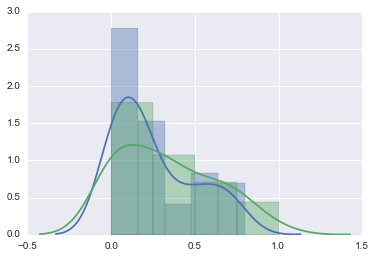

In [63]:
import seaborn as sns
%matplotlib inline
sns.distplot(precisions)
sns.distplot(ndcgs)

In [64]:
precisions

[0.10000000000000001,
 0.20000000000000001,
 0.59999999999999998,
 0.0,
 0.20000000000000001,
 0.20000000000000001,
 0.40000000000000002,
 0.5,
 0.10000000000000001,
 0.40000000000000002,
 0.20000000000000001,
 0.69999999999999996,
 0.0,
 0.10000000000000001,
 0.10000000000000001,
 0.69999999999999996,
 0.69999999999999996,
 0.20000000000000001,
 0.80000000000000004,
 0.0,
 0.5,
 0.10000000000000001,
 0.59999999999999998,
 0.29999999999999999,
 0.20000000000000001,
 0.10000000000000001,
 0.10000000000000001,
 0.40000000000000002,
 0.0,
 0.0,
 0.0,
 0.10000000000000001,
 0.10000000000000001,
 0.69999999999999996,
 0.10000000000000001,
 0.0,
 0.5,
 0.59999999999999998,
 0.20000000000000001,
 0.20000000000000001,
 0.20000000000000001,
 0.0,
 0.0,
 0.0,
 0.29999999999999999]

In [65]:
ndcgs


[0.066254223454389041,
 0.2895229882348575,
 0.55206785919664003,
 0.0,
 0.16815228646891087,
 0.2658200052773918,
 0.49593892046994648,
 0.53026310994461812,
 0.28906482631788788,
 1.0,
 0.29345568839744024,
 0.72808554599071662,
 0.0,
 0.16716045496620227,
 0.39038004999210169,
 0.78591628563015836,
 0.79095063250947362,
 0.6366824387328317,
 0.86301528970168828,
 0.0,
 0.44173955623824734,
 0.066254223454389041,
 0.61540622758623909,
 0.2394408568026152,
 0.30523488393970122,
 0.24630238874072999,
 0.39038004999210169,
 0.62782484664154947,
 0.0,
 0.0,
 0.0,
 0.30657359638272919,
 0.078398268978675342,
 0.77880658698518745,
 0.069431221936777282,
 0.0,
 0.64218672666890109,
 0.69843659471198116,
 0.14279514403613736,
 0.21222636597291461,
 0.40179981797758046,
 0.0,
 0.0,
 0.0,
 0.42492601381667111]